In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('./input/Iris.csv') # load the dataset

In [3]:
df.head() # show the first 5 rows from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum() # checking for null in dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.drop('Id', axis=1, inplace=True) # dropping redundant column

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# our target variable species, lets find out the no. of unique species
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Exploratory Data Analysis

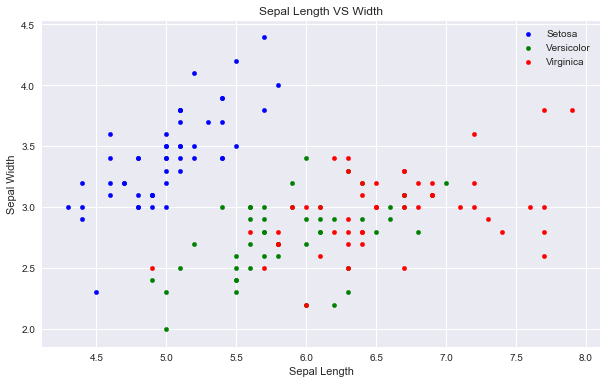

In [10]:
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Setosa')
df[df.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Versicolor', ax=fig)
df[df.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='red', label='Virginica', ax=fig)
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length VS Width')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

In [11]:
# from the above scatter plot, we can see theres a positive correlation between Sepal length and width for setosa
# however we couldn't say about the other two species
df[(df['Species'] == 'Iris-setosa')][['SepalLengthCm', 'SepalWidthCm']].corr()

,SepalLengthCm,SepalWidthCm
SepalLengthCm,1.00000,0.74678
SepalWidthCm,0.74678,1.00000


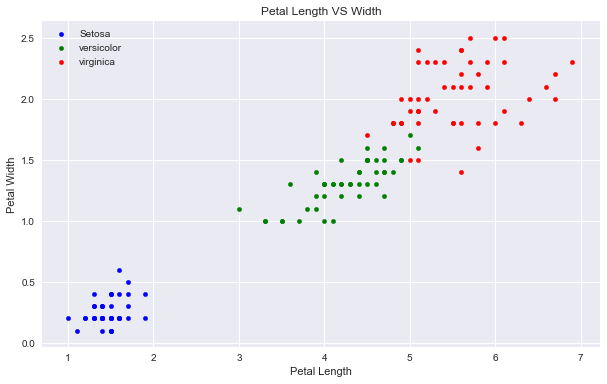

In [12]:
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Setosa')
df[df.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='versicolor', ax=fig)
df[df.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='red', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

From the above graph we can see a linear trend for all three species, thus we can identify that Petal Length and Width may help in our predictions later on.

#### Lets see how are the length and width distributed

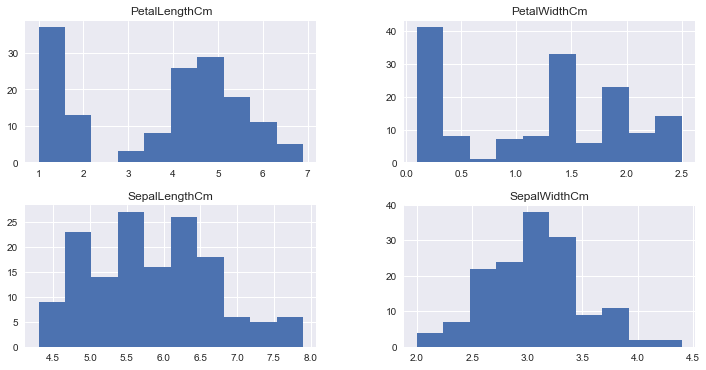

In [13]:
df.hist()
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

#### Now let us see how the length and width vary according to the species

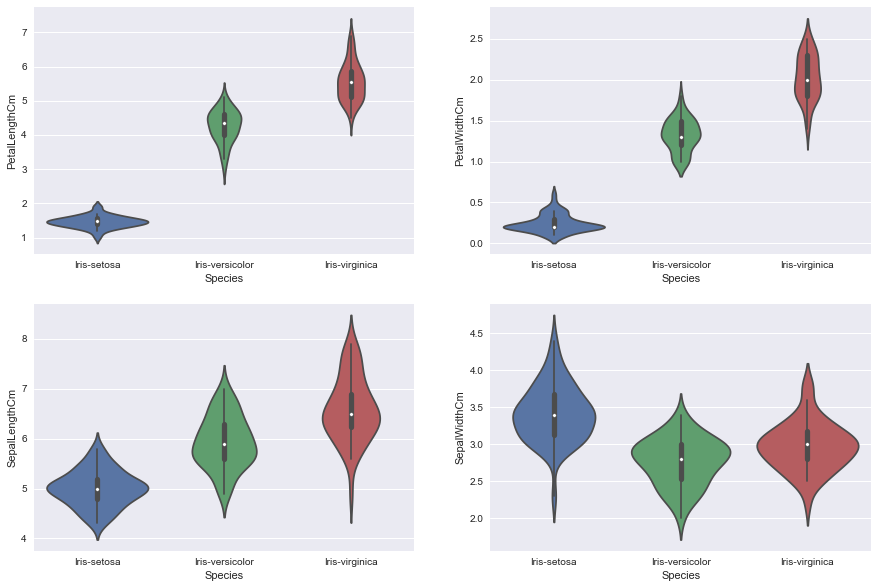

In [14]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)
plt.show()

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

### Data Visualization

-  There is a linear trend for iris-setosa, but not much for the other two species
-  Overlapping between iris-versicolor (green) and iris-virginica (red)

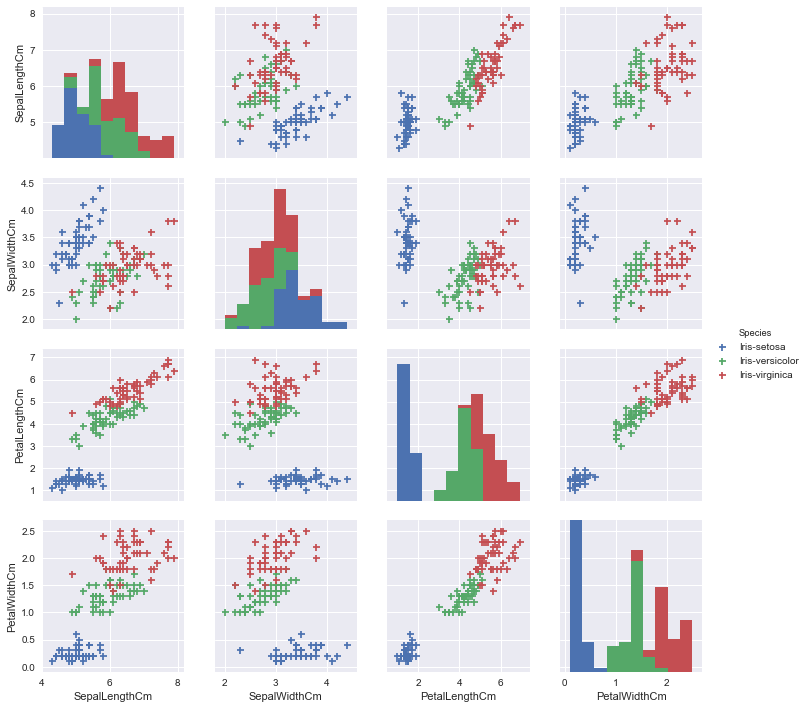

In [15]:
pairplot = sns.pairplot(df, hue='Species', markers='+')
plt.show()

### Correlation Matrix

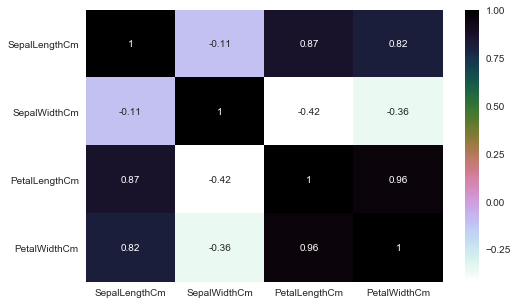

In [16]:
# look at the heatmap of the correlation matrix of our dataset
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')
plt.show()

<b>Observation</b>

Given the above observation:
-  Petal width and Petal length are highly correlated 0.96 (<b>Strong</b> candidates for predictions)
-  Sepal Width and Sepal length are not correlated 
-  Slight negative correlation between Petal length and Sepal Width

## Creating the Model

<b>The given problem is a classification problem, thus we need to employ a classification algorithm for it.</b>

<b>Features</b>:  SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

<b>Target variable</b>:  Species

In [17]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [18]:
df.shape # get the shape of the dataset

(150, 5)

In [19]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
X = df.drop('Species', axis=1)
y = df['Species']
# splits data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [21]:
X_train.shape, X_test.shape 

((105, 4), (45, 4))

### Fitting our model

#### Support Vector Machine (SVM)

In [22]:
model = svm.SVC()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of the SVM is:', metrics.accuracy_score(y_test, prediction))

The accuracy of the SVM is: 0.9777777777777777


#### Logistic Regression

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of the Logistic regression is:', metrics.accuracy_score(y_test, prediction))

The accuracy of the Logistic regression is: 0.9555555555555556


#### Decision Tree

In [24]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of the Decision Tree is:', metrics.accuracy_score(y_test, prediction))

The accuracy of the Decision Tree is: 0.9777777777777777


#### K-Nearest Neighbours

In [25]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of the KNN is:', metrics.accuracy_score(y_test, prediction))

The accuracy of the KNN is: 0.9777777777777777


#### Let's check the accuracy for various values of n for KNN

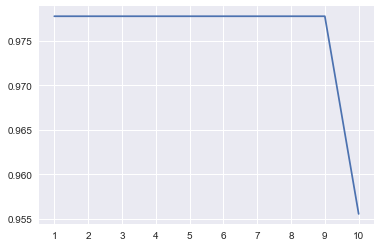

In [26]:
n_neighbors = list(range(1, 11))
n = pd.Series()
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    n = n.append(pd.Series(metrics.accuracy_score(y_test, prediction)))
plt.plot(n_neighbors, n)
plt.xticks(x)
plt.show()

Above graph showing the accuracy for the KNN models using different values of n

### We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

#### Creating Petals and Sepals Training Data

In [27]:
petal = df[['PetalLengthCm', 'PetalWidthCm', 'Species']]
sepal = df[['SepalLengthCm', 'SepalWidthCm', 'Species']]

In [28]:
X_p = petal.drop('Species', axis=1)
y_p = petal['Species']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.3, random_state=0)

X_s = sepal.drop('Species', axis=1)
y_s = sepal['Species']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.3, random_state=0)

#### SVM

In [29]:
model = svm.SVC()
model.fit(X_train_p, y_train_p)
prediction = model.predict(X_test_p)
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(y_test_p, prediction))



model = svm.SVC()
model.fit(X_train_s, y_train_s)
prediction = model.predict(X_test_s)
print('The accuracy of the SVM using Sepals is:',metrics.accuracy_score(y_test_s, prediction))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepals is: 0.8


#### Logistic Regression

In [30]:
model = LogisticRegression()
model.fit(X_train_p, y_train_p)
prediction = model.predict(X_test_p)
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(y_test_p, prediction))



model = LogisticRegression()
model.fit(X_train_s, y_train_s)
prediction = model.predict(X_test_s)
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(y_test_s, prediction))

The accuracy of the Logistic Regression using Petals is: 0.6888888888888889
The accuracy of the Logistic Regression using Sepals is: 0.6444444444444445


#### Decision Tree

In [31]:
model = DecisionTreeClassifier()
model.fit(X_train_p, y_train_p)
prediction = model.predict(X_test_p)
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(y_test_p, prediction))



model = DecisionTreeClassifier()
model.fit(X_train_s, y_train_s)
prediction = model.predict(X_test_s)
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(y_test_s, prediction))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


#### K-Nearest Neighbours

In [32]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_p, y_train_p)
prediction = model.predict(X_test_p)
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(y_test_p, prediction))

model = svm.SVC()
model.fit(X_train_s, y_train_s)
prediction = model.predict(X_test_s)
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(y_test_s, prediction))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.8


#### Observations:
-  It seems like petals yields better accuracy score compares over sepals (Correlation Matrix)

In [33]:
# References & credits to
# https://www.kaggle.com/ash316/ml-from-scratch-with-iris